#### In this notebook I have used dataset from Kaggle https://www.kaggle.com/datasets/amandam1/breastcancerdataset to develop a Machine learning model that tries to predict whether a patient with breast cancer will survive or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('BRCA.csv',skip_blank_lines=True)

In [3]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
df.shape

(341, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

#### First Step is exploratory data analysis which includes checking data for null values and verifying the consistency and validity of data

In [6]:
df.isna().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

#### all columns seem to have 7 rows with null values in the end. Lets check for duplicates

In [7]:
df.duplicated().sum()

6

In [8]:
df.loc[df.duplicated()]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.loc[df.index[-8:]]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
333,TCGA-B6-A40B,76.0,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,Dead
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### going to drop the last 7 rows from all columns as they are just NaN values

In [10]:
df.drop(df.index[-7:], inplace=True)

In [11]:
df.isna().sum()/len(df)*100 

Patient_ID            0.000000
Age                   0.000000
Gender                0.000000
Protein1              0.000000
Protein2              0.000000
Protein3              0.000000
Protein4              0.000000
Tumour_Stage          0.000000
Histology             0.000000
ER status             0.000000
PR status             0.000000
HER2 status           0.000000
Surgery_type          0.000000
Date_of_Surgery       0.000000
Date_of_Last_Visit    5.089820
Patient_Status        3.892216
dtype: float64

#### Number of null values in patient status is less than 5, so going to drop those rows

In [12]:
df.dropna(subset=['Patient_Status'], inplace =True)


#### 13 empty patient rows are now dropped

#### check data distribution

<Axes: xlabel='Gender', ylabel='count'>

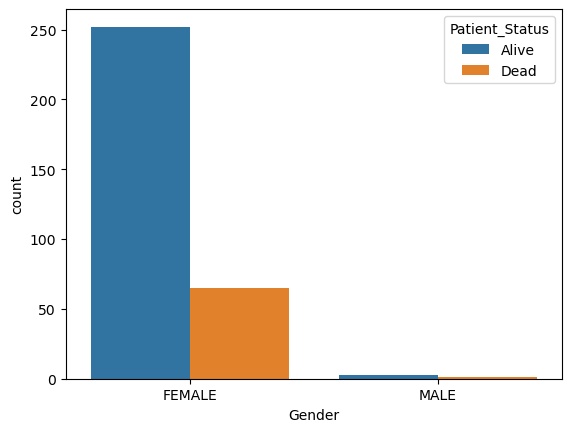

In [13]:
#df['Gender'].value_counts().plot(kind='bar')
sns.countplot(data= df ,x=df['Gender'], hue=df['Patient_Status'])


#### We can observe that the gender disctribution is very skewed

<Axes: xlabel='Tumour_Stage', ylabel='count'>

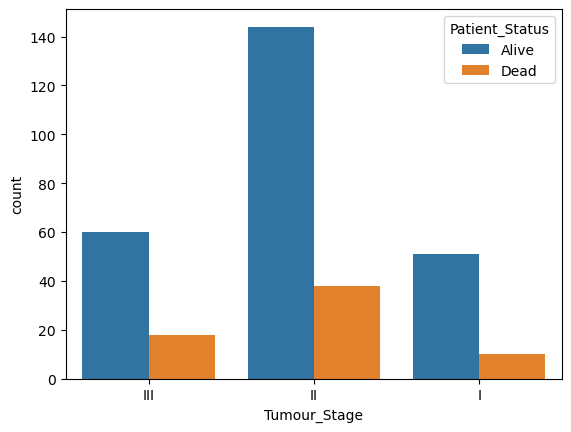

In [14]:
#df['Tumour_Stage'].value_counts().plot(kind='bar')
sns.countplot(data=df, x= df['Tumour_Stage'],hue=df['Patient_Status'])

(array([0, 1, 2]),
 [Text(0, 0, 'Infiltrating Ductal Carcinoma'),
  Text(1, 0, 'Mucinous Carcinoma'),
  Text(2, 0, 'Infiltrating Lobular Carcinoma')])

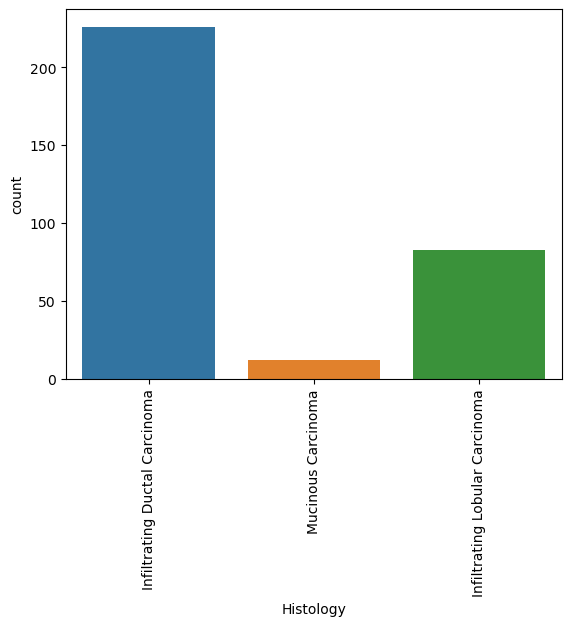

In [15]:
df['Histology'].value_counts()
sns.countplot(data=df, x= df['Histology'])
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Alive'), Text(1, 0, 'Dead')])

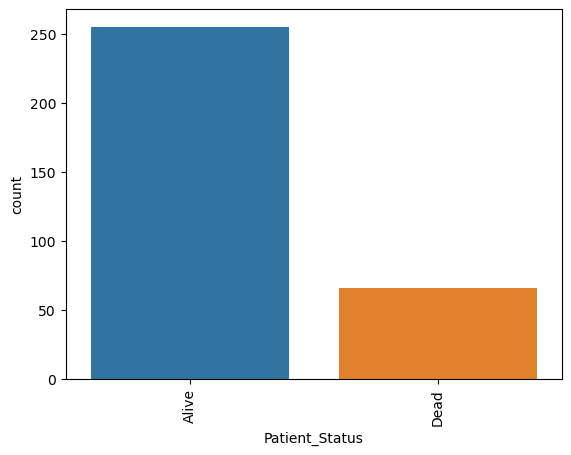

In [16]:
df['Patient_Status'].value_counts()
sns.countplot(data=df, x= df['Patient_Status'])
plt.xticks(rotation=90)

#### the target label distribution is very imbalanced

In [17]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
cat_cols

['Patient_ID',
 'Gender',
 'Tumour_Stage',
 'Histology',
 'ER status',
 'PR status',
 'HER2 status',
 'Surgery_type',
 'Date_of_Surgery',
 'Date_of_Last_Visit',
 'Patient_Status']

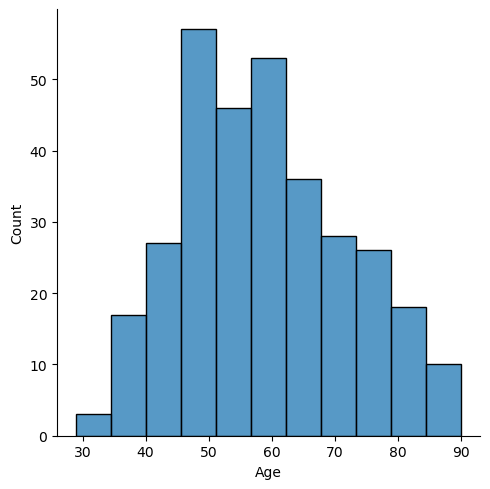

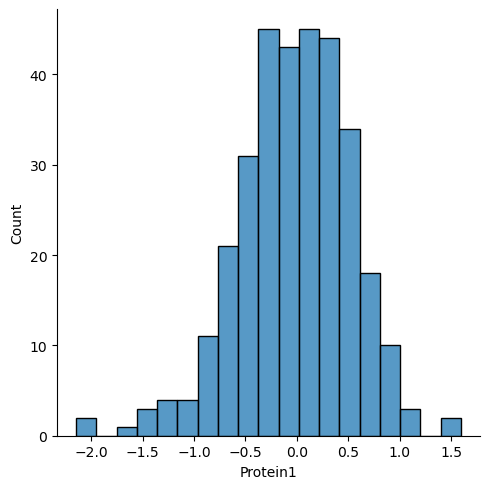

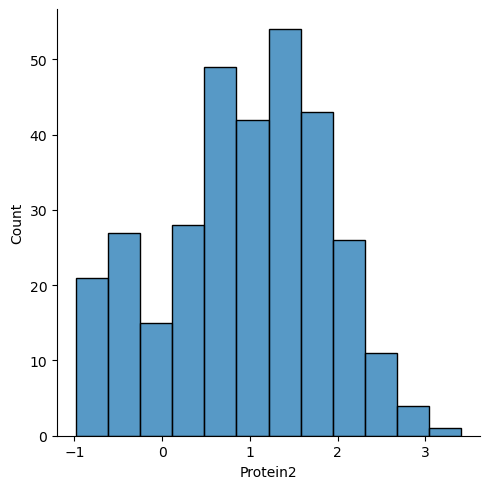

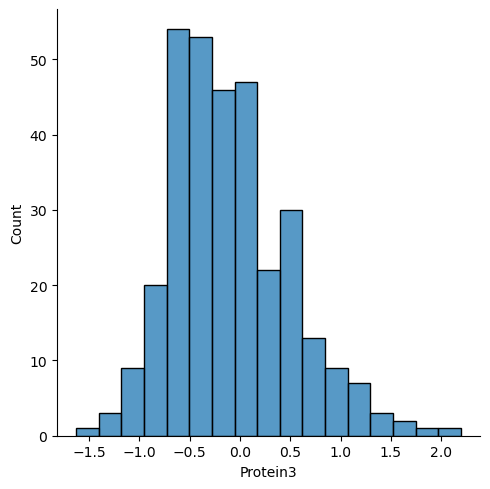

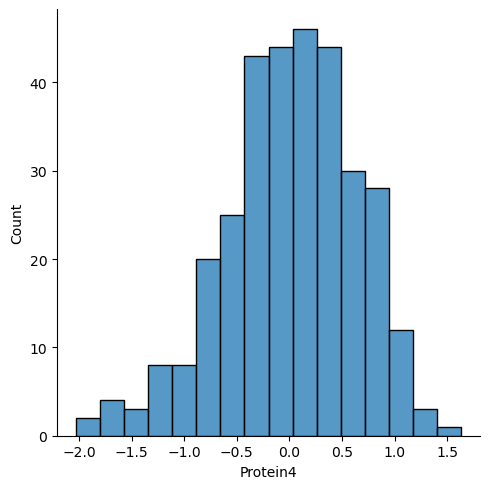

In [18]:
for col in num_cols:
    sns.displot(data=df, x=df[col])

#### Although target column has imbalanced data, I will first build a model based on actual data and then perform downsampling/upsampling to compare the results

In [19]:
df.columns


Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [20]:
X = df.drop(['Patient_ID','Date_of_Surgery','Date_of_Last_Visit','Patient_Status'],axis=1)
Y = df['Patient_Status']
X.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other


#### I will do train test split that is stratified on the target column to ensure that both traning data and testing data have equal proportion of both the classes of Patient Status

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y, test_size=0.2,random_state=42)

In [22]:
cat_cols = X_train.select_dtypes(exclude=np.number).columns.to_list()
print(cat_cols, num_cols)

['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type'] ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']


In [23]:
ohe_cols = ['Histology','Surgery_type']
ordinal_cols = ['Gender', 'Tumour_Stage', 'ER status', 'PR status', 'HER2 status']

In [24]:
X_train['Histology'].unique() #2 cols after OHE
X_train['Surgery_type'].unique()#3 cols after OHE


array(['Other', 'Simple Mastectomy', 'Modified Radical Mastectomy',
       'Lumpectomy'], dtype=object)

#### So expecting 15 columns in total after transformation 5 numerical cols, 5 ordinal columns, 2 cols from OHE of histology and 3 cols from OHE of Surgery Type

In [25]:
preprocessor = ColumnTransformer(transformers=[
    ('tumor_tfr',OrdinalEncoder(categories=[['I','II','III']]),['Tumour_Stage']),
    ('gender_tfr',OrdinalEncoder(),['Gender', 'ER status', 'PR status', 'HER2 status']),
    ('num_tfr',StandardScaler(),num_cols),
    ('ohe_tfr',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),ohe_cols)
])

In [26]:
X_preprocessed= preprocessor.fit_transform(X_train)

c:\Users\nidhi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
preprocessor.named_transformers_['ohe_tfr'].get_feature_names_out()

array(['Histology_Infiltrating Lobular Carcinoma',
       'Histology_Mucinous Carcinoma',
       'Surgery_type_Modified Radical Mastectomy', 'Surgery_type_Other',
       'Surgery_type_Simple Mastectomy'], dtype=object)

In [28]:
preprocessor.named_transformers_['num_tfr'].mean_

array([ 5.90039062e+01, -1.63711842e-02,  9.42567532e-01, -7.25056000e-02,
        2.10540674e-02])

In [29]:
preprocessor.named_transformers_['gender_tfr'].categories_

[array(['FEMALE', 'MALE'], dtype=object),
 array(['Positive'], dtype=object),
 array(['Positive'], dtype=object),
 array(['Negative', 'Positive'], dtype=object)]

In [30]:
preprocessor.named_transformers_['tumor_tfr'].categories_

[array(['I', 'II', 'III'], dtype=object)]

In [31]:
X_preprocessed.shape

(256, 15)

#### There are some columns which have same value in all rows such ER Status and PR Status. I will perform PCA to remove such columns as well as reduce the dimensionality by removing less useful columns

In [32]:
pipe = Pipeline(steps=[
    ('preprocess',preprocessor),
    ('pca',PCA(n_components=12))

])

In [33]:
X_train_final = pipe.fit_transform(X_train)
X_test_final = pipe.transform(X_test)

c:\Users\nidhi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
le = LabelEncoder()
Y_train_final = le.fit_transform(Y_train)
Y_test_final = le.transform(Y_test)

In [35]:
Y_train_final

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

#### Data preparation is now done and now I will start training the model on this prepared data, but first I want to identify whether the data is linear or non linear, I will check that using PC1 and PC0 of PCA

In [36]:
#method 1
pca1 = PCA(n_components=3,random_state=42)
PCA_df = pd.DataFrame(pca1.fit_transform(X_preprocessed))
Y_train_pd = pd.DataFrame(Y_train_final)
Y_train_pd.reset_index(drop=True, inplace=True)
PCA_df = pd.concat([PCA_df, Y_train_pd], axis=1, ignore_index=True )
PCA_df.head()

,0,1,2,3
0,-0.226619,-0.495161,-0.097383,0
1,-0.516235,-1.325343,-1.248917,0
2,-0.462522,0.127502,0.083068,0
3,1.931896,-0.930833,-1.037631,1
4,-1.473490,-0.349077,0.843149,0


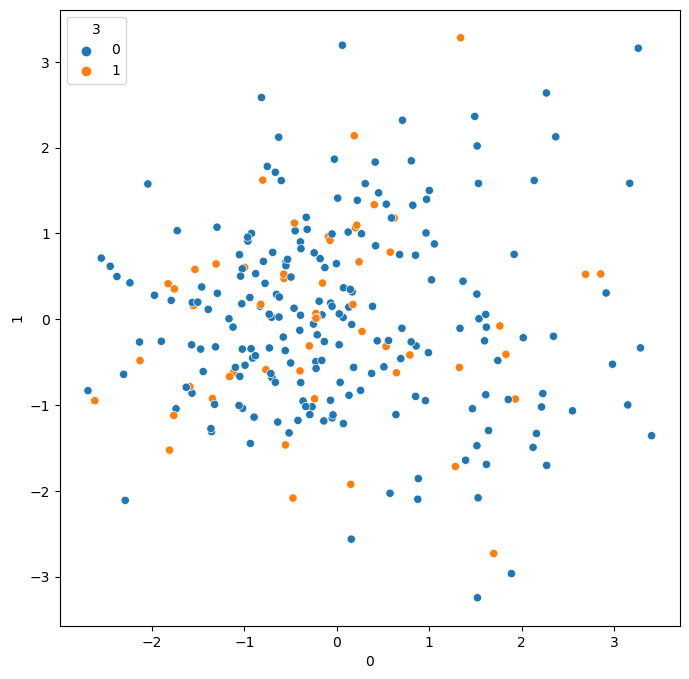

In [37]:
plt.figure(figsize=(8,8))
#sns.scatterplot( PCA_df[0],PCA_df[1],hue=PCA_df[3])
sns.scatterplot(x=PCA_df[0],y=PCA_df[1],hue=PCA_df[3])
plt.show()

In [38]:
#method 2
pca2 = PCA(random_state=42) # Compute PCA
data_pca = pca2.fit_transform(X_preprocessed) # Fit and transform data
eigenvalues = pca2.explained_variance_ # Get eigenvalues
eigenvalues = np.round(eigenvalues, 5) # Round off eigenvalues
print("Eigen values of  data: ", eigenvalues.tolist())

Eigen values of  data:  [1.61651, 1.20098, 1.0361, 0.68838, 0.53467, 0.4269, 0.27726, 0.20733, 0.17242, 0.07626, 0.04773, 0.03535, 0.01452, 0.0, 0.0]


#### Eigen values are large for all components 

Text(0, 0.5, 'Principal Component 1')

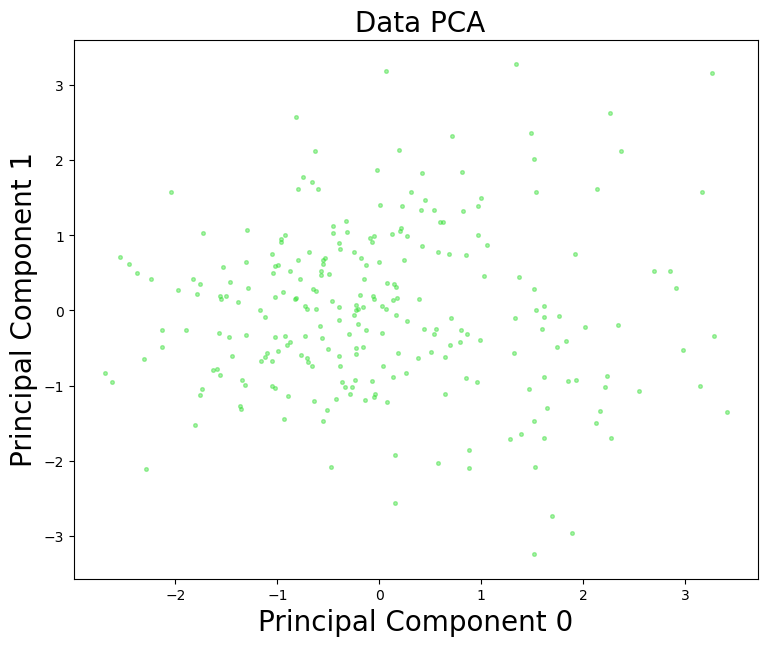

In [39]:
fig = plt.figure(figsize= (30, 7))

ax = fig.add_subplot(131) # PCA  data
ax.scatter(data_pca[:,0], data_pca[:,1], marker= '.', color= '#2ade2a', s= 28, alpha= 0.4)
ax.set_title(" Data PCA", fontsize= 20)
ax.set_xlabel("Principal Component 0", fontsize= 20)
ax.set_ylabel("Principal Component 1", fontsize= 20)

#### using these two methods I have identified that the data is non linear and I will use a classification algorithm such as SVC , random forest, K nearest neighbor classifier to build the classification model

In [40]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

rf = RandomForestClassifier(n_estimators=10)
gb = GradientBoostingClassifier()
svc = SVC(kernel='poly',degree=3)

In [41]:
rf.fit(X_train_final,Y_train_final)
y_pred = rf.predict(X_test_final)
accuracy_score(Y_test_final,y_pred)

0.7692307692307693

In [42]:
gb.fit(X_train_final,Y_train_final)
y_pred = gb.predict(X_test_final)
accuracy_score(Y_test_final,y_pred)

0.7692307692307693

In [43]:
svc.fit(X_train_final,Y_train_final)
y_pred = svc.predict(X_test_final)
accuracy_score(Y_test_final,y_pred)

0.8

In [44]:
confusion_matrix(Y_test_final,y_pred)

array([[52,  0],
       [13,  0]], dtype=int64)

#### In the above confusion matrix, TN = 52 and FN =13, False Negative is all cases where actual value was 1 and it was predicted as 0

In [45]:
result = pd.DataFrame()
result['Actual Label'] = Y_test_final
result['SV Prediction'] = y_pred
result.head(10)

,Actual Label,SV Prediction
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [46]:
result['Actual Label'].value_counts()
result['SV Prediction'].value_counts()

0    65
Name: SV Prediction, dtype: int64

#### our model has misclassified all the 13 alive data points this is because the target variables in the dataset are not balanced.
#### I will perform undersampling and retrain the model again

In [47]:
Y.value_counts()

Alive    255
Dead      66
Name: Patient_Status, dtype: int64

In [48]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, Y)

print('original dataset shape:', Y.value_counts())
print('Resample dataset shape', y_rus.value_counts())

original dataset shape: Alive    255
Dead      66
Name: Patient_Status, dtype: int64
Resample dataset shape Alive    66
Dead     66
Name: Patient_Status, dtype: int64


#### Undersampled dataset is very small, I will try oversampling. Undersampling and oversampling should only be applied on the training data

In [55]:

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X_train, Y_train)

print('Original dataset shape', Y_train.value_counts())
print('Resample dataset shape', y_ros.value_counts())

Original dataset shape Alive    203
Dead      53
Name: Patient_Status, dtype: int64
Resample dataset shape Alive    203
Dead     203
Name: Patient_Status, dtype: int64


In [56]:
#X_train_os, X_test_os, Y_train_os, Y_test_os = train_test_split(x_ros,y_ros, test_size=0.2,random_state=42)
X_train_final = pipe.fit_transform(x_ros)
X_test_final = pipe.transform(X_test)
Y_train_final = le.fit_transform(y_ros)
Y_test_final = le.transform(Y_test)

c:\Users\nidhi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [57]:
rf.fit(X_train_final,Y_train_final)
y_pred = rf.predict(X_test_final)
accuracy_score(Y_test_final,y_pred)

0.7846153846153846

In [58]:
confusion_matrix(Y_test_final,y_pred)

array([[49,  3],
       [11,  2]], dtype=int64)

#### After oversampling, the accuracy of the model has improved and I will try to improve it further by hyperparameter tuning.


In [59]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)
rf_grid.fit(X_train_final,Y_train_final)


{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [60]:
rf_grid.best_params_


{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 120}

In [61]:
rf_grid.best_score_

0.9335140018066849

In [64]:
rf_final = RandomForestClassifier(max_depth=4,max_features=0.2,max_samples=1.0,n_estimators=120)
rf_final.fit(X_train_final,Y_train_final)
y_pred = rf.predict(X_test_final)
accuracy_score(Y_test_final,y_pred)

0.7846153846153846

In [63]:
confusion_matrix(Y_test_final,y_pred)

array([[49,  3],
       [11,  2]], dtype=int64)